In [2]:
import polars as pl
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
import dash
from dash import dcc, html
# import dash_core_components as dcc
# import dash_html_components as html
from datetime import datetime
from dash.dependencies import Input, Output

In [4]:
# read_csv reads data into a DataFrame. scan_csv reads data into a "LazyFrame". :)
df = pl.read_csv("datasets/US_Accidents_March23.csv")
pl.Config(tbl_rows=100)
pl.Config(tbl_cols=100)
df.head()

ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,i64,str,str,f64,f64,str,str,f64,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,str,str,str,str
"""A-1""","""Source2""",3,"""2016-02-08 05:…","""2016-02-08 11:…",39.865147,-84.058723,null,null,0.01,"""Right lane blo…","""I-70 E""","""Dayton""","""Montgomery""","""OH""","""45424""","""US""","""US/Eastern""","""KFFO""","""2016-02-08 05:…",36.9,null,91.0,29.68,10.0,"""Calm""",null,0.02,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Night""","""Night""","""Night"""
"""A-2""","""Source2""",2,"""2016-02-08 06:…","""2016-02-08 06:…",39.928059,-82.831184,null,null,0.01,"""Accident on Br…","""Brice Rd""","""Reynoldsburg""","""Franklin""","""OH""","""43068-3402""","""US""","""US/Eastern""","""KCMH""","""2016-02-08 05:…",37.9,null,100.0,29.65,10.0,"""Calm""",null,0.0,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Night""","""Night""","""Day"""
"""A-3""","""Source2""",2,"""2016-02-08 06:…","""2016-02-08 07:…",39.063148,-84.032608,null,null,0.01,"""Accident on OH…","""State Route 32…","""Williamsburg""","""Clermont""","""OH""","""45176""","""US""","""US/Eastern""","""KI69""","""2016-02-08 06:…",36.0,33.3,100.0,29.67,10.0,"""SW""",3.5,null,"""Overcast""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Night""","""Night""","""Day""","""Day"""
"""A-4""","""Source2""",3,"""2016-02-08 07:…","""2016-02-08 07:…",39.747753,-84.205582,null,null,0.01,"""Accident on I-…","""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US""","""US/Eastern""","""KDAY""","""2016-02-08 07:…",35.1,31.0,96.0,29.64,9.0,"""SW""",4.6,null,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Day""","""Day""","""Day"""
"""A-5""","""Source2""",2,"""2016-02-08 07:…","""2016-02-08 08:…",39.627781,-84.188354,null,null,0.01,"""Accident on Mc…","""Miamisburg Cen…","""Dayton""","""Montgomery""","""OH""","""45459""","""US""","""US/Eastern""","""KMGY""","""2016-02-08 07:…",36.0,33.3,89.0,29.65,6.0,"""SW""",3.5,null,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Day""","""Day""","""Day""","""Day"""


In [ ]:
# df = pd.read_csv("US_Accidents_March23.csv")
# df
# Im going to use polars because it read the data about 21 times faster than pandas (2s vs 42.5s).
# i also just want to try polars out. and i might need to use pandas if i cant figure something out in polars

In [ ]:
# Is there any missing data? If so, visualize it in a plot.
missing = df.null_count()
missing

ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,3402762,3402762,0,5,10869,253,0,0,1915,0,7808,22635,120228,163853,1999019,174144,140679,177098,175206,571233,2203586,173459,0,0,0,0,0,0,0,0,0,0,0,0,0,23246,23246,23246,23246


In [ ]:
missing_df = missing.to_pandas()
missing_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,0,0,0,0,0,0,3402762,3402762,0,...,0,0,0,0,0,0,23246,23246,23246,23246


In [ ]:
# plotting the missing data using plotly express
fig100 = px.imshow(missing_df, color_continuous_scale="Turbo")
fig100.update_layout(title="Missing Data")
fig100.show()

In [ ]:
# Remove any columns that you may find not useful for your analysis.
cols_to_remove = ["Source", "End_Time", "Description", "Zipcode", "Country", "Timezone", "Weather_Timestamp", "Temperature(F)", "Wind_Chill(F)", "Wind_Direction", "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight", "Sunrise_Sunset"]

In [ ]:
df = df.drop(cols_to_remove)
df.head()

ID,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,City,County,State,Airport_Code,Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
str,i64,str,f64,f64,str,str,f64,str,str,str,str,str,f64,f64,f64,f64,f64,str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool
"""A-1""",3,"""2016-02-08 05:…",39.865147,-84.058723,null,null,0.01,"""I-70 E""","""Dayton""","""Montgomery""","""OH""","""KFFO""",91.0,29.68,10.0,null,0.02,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false
"""A-2""",2,"""2016-02-08 06:…",39.928059,-82.831184,null,null,0.01,"""Brice Rd""","""Reynoldsburg""","""Franklin""","""OH""","""KCMH""",100.0,29.65,10.0,null,0.0,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false
"""A-3""",2,"""2016-02-08 06:…",39.063148,-84.032608,null,null,0.01,"""State Route 32…","""Williamsburg""","""Clermont""","""OH""","""KI69""",100.0,29.67,10.0,3.5,null,"""Overcast""",false,false,false,false,false,false,false,false,false,false,false,true,false
"""A-4""",3,"""2016-02-08 07:…",39.747753,-84.205582,null,null,0.01,"""I-75 S""","""Dayton""","""Montgomery""","""OH""","""KDAY""",96.0,29.64,9.0,4.6,null,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,false,false
"""A-5""",2,"""2016-02-08 07:…",39.627781,-84.188354,null,null,0.01,"""Miamisburg Cen…","""Dayton""","""Montgomery""","""OH""","""KMGY""",89.0,29.65,6.0,3.5,null,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,true,false


In [ ]:
#Plot the top 10 cities with the most accidents.
top10 = df["City"].value_counts(sort=True).head(10)
print(top10.head(10))

shape: (10, 2)
┌─────────────┬────────┐
│ City        ┆ counts │
│ ---         ┆ ---    │
│ str         ┆ u32    │
╞═════════════╪════════╡
│ Miami       ┆ 186917 │
│ Houston     ┆ 169609 │
│ Los Angeles ┆ 156491 │
│ Charlotte   ┆ 138652 │
│ Dallas      ┆ 130939 │
│ Orlando     ┆ 109733 │
│ Austin      ┆ 97359  │
│ Raleigh     ┆ 86079  │
│ Nashville   ┆ 72930  │
│ Baton Rouge ┆ 71588  │
└─────────────┴────────┘


In [ ]:
fig3 = px.bar(top10, x=top10["City"], y=top10["counts"], labels={"x": "City", "y": "Number of Accidents"}, title="Top 10 Cities with the Most Accidents")
fig3.show()

In [ ]:
# # Plot the distribution of the start time.
# from datetime import datetime

# # Extract the 'Start_Time' column
# start_times = df['Start_Time']

# # Iterate over unique values to identify the datetime format
# unique_formats = set()
# for value in start_times.unique().to_list():
#     try:
#         datetime.strptime(value, '%Y-%m-%d %H:%M:%S')
#         unique_formats.add('%Y-%m-%d %H:%M:%S')
#     except ValueError:
#         pass

# # Print the identified datetime formats
# print(unique_formats)



In [ ]:
# # Convert the 'Start_Time' column to datetime
# start_times_dt = start_times.apply(
#     lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S') if len(x) > 0 else None
# )

# # Update the 'Start_Time' column in the DataFrame
# df = df.with_column('Start_Time', start_times_dt.cast(pl.Date))

# # Print the updated DataFrame
# print(df)

Welp... datetime in polars is kind of hard

In [ ]:
# # Plot the distribution of the start time.
# make start_time a datetime
df1 = df.to_pandas()
df1["Start_Time"] = pd.to_datetime(df1["Start_Time"])

# plot distrubution of start time
# fig4 = px.histogram(df1, x="Start_Time", title="Distribution of Start Time")
# fig4.show()

In [ ]:
# Is the distribution of accidents by hour the same on weekends as on weekdays?
# make a new column for days of the week
df1["Day_of_Week"] = df1["Start_Time"].dt.weekday #.day_name()
df1["Hour_of_Day"] = df1["Start_Time"].dt.hour

weekday_data = df1[df1["Day_of_Week"] < 5]
weekend_data = df1[df1["Day_of_Week"] >= 5] 

weekday_counts = weekday_data["Hour_of_Day"].value_counts().sort_index()
weekend_counts = weekend_data["Hour_of_Day"].value_counts().sort_index()
# day_of_week_count = df1["Day_of_Week"].value_counts(sort=True)
plot_data = pl.DataFrame({
    "Hour_of_Day": weekday_counts.index.tolist(),
    "Weekday_Counts": weekday_counts.values.tolist(),
    "Weekend_Counts": weekend_counts.values.tolist()
})

fig4 = px.line(plot_data.to_pandas(), x="Hour_of_Day", y=['Weekday_Counts', 'Weekend_Counts'],
               title="Distribution of Accidents by Hour (Weekdays vs Weekends)",
               labels={"value":"Accident Count"})
fig4.show()


The distribution of accidents by hours is not the same on weekends as on weekdays. The distribution of accidents on weekends is lower than the distribution of accidents on weekdays.

In [ ]:
# What is the distribution of start time on Sundays?
sunday_data = df1[df1["Day_of_Week"] == 6] # 6 = Sunday
sunday_counts = sunday_data["Hour_of_Day"].value_counts().sort_index()
fig5 = px.bar(sunday_counts, x=sunday_counts.index.tolist(), y=sunday_counts.values.tolist(), title="Distribution of Start Time on Sundays")
fig5.show()

In [ ]:
# # Create a geographical plot to show accidents across a map of the United States.
# df78 = df1[['Start_Lng', 'Start_Lat']]

# # Create a scatter map plot
# fig = px.scatter_mapbox(df78,
#                         lat="Start_Lat",
#                         lon="Start_Lng",
#                         mapbox_style="carto-positron",
#                         zoom=3)

# # Set the map center
# fig.update_layout(mapbox_center={"lat": 37.0902, "lon": -95.7129})

# # Show the plot
# fig.show()

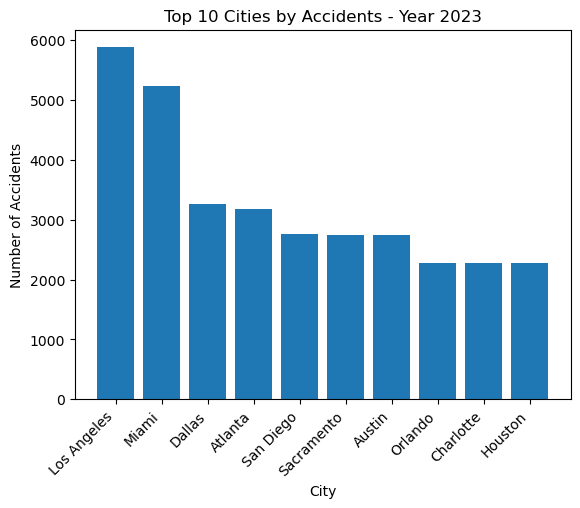

In [ ]:
# Among the top 100 cities in number of accidents, which states do they belong to most frequently?\
df1["Year"] = df1["Start_Time"].dt.year
df2 = df1[["City", "Year"]]
city_year_counts = df2.groupby(["City", "Year"]).size().reset_index(name="AccidentCount")

# Get the top 100 cities based on the total number of accidents
top_cities = city_year_counts.groupby('City')['AccidentCount'].sum().nlargest(100).index

# Filter data for the top 100 cities
top_city_year_counts = city_year_counts[city_year_counts['City'].isin(top_cities)]

# Create an empty figure
fig = plt.figure()

# Get the unique years in the data
years = top_city_year_counts['Year'].unique()

# Define the update function
def update(frame):
    # Filter data for the current year
    current_data = top_city_year_counts[top_city_year_counts['Year'] == years[frame]]
    
    # Sort the data by the number of accidents
    current_data = current_data.sort_values('AccidentCount', ascending=False)
    
    # Get the top 10 cities for the current year
    top_10_cities = current_data.head(10)
    
    # Clear the current plot
    plt.cla()
    
    # Plot the updated data
    plt.bar(top_10_cities['City'], top_10_cities['AccidentCount'])
    
    # Set plot title and labels
    plt.title(f'Top 10 Cities by Accidents - Year {years[frame]}')
    plt.xlabel('City')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45, ha='right')
    

# Create the initial plot
initial_data = top_city_year_counts[top_city_year_counts['Year'] == years[0]]
initial_data = initial_data.sort_values('AccidentCount', ascending=False)
initial_data = initial_data.head(10)
plt.bar(initial_data['City'], initial_data['AccidentCount'])
plt.title(f'Top 10 Cities by Accidents - Year {years[0]}')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
# Rotate x-axis ticks
plt.xticks(rotation=90, ha='right')

# Create the animation
ani = FuncAnimation(fig, update, frames=len(years), interval=500, repeat=True)

# Show the animation
ani.save("animation.mp4")
plt.show()

In [ ]:
# plotly animation
# Load the dataset and extract necessary columns
df1['Year'] = pd.to_datetime(df1['Start_Time']).dt.year
df1['City'] = df1['City'].str.title()

# Group by city and year, and count the number of accidents
city_year_counts = df1.groupby(['City', 'Year']).size().reset_index(name='AccidentCount')

# Get the top 100 cities based on total accident count
top_100_cities = city_year_counts.groupby('City').sum().nlargest(100, 'AccidentCount').index

# Filter the data for the top 100 cities
filtered_data = city_year_counts[city_year_counts['City'].isin(top_100_cities)]

# Create animated graph using Plotly Express
fig400 = px.bar(filtered_data, x='City', y='AccidentCount', animation_frame='Year',
                range_y=[0, filtered_data['AccidentCount'].max()],
                labels={'City': 'City', 'AccidentCount': 'Number of Accidents'},
                title='Number of Accidents in Top 100 Cities')

fig400.update_layout(xaxis={'type': 'category'},
                     height=600,
                     xaxis_title='City',
                     yaxis_title='Number of Accidents',
                     updatemenus=[dict(type='buttons', showactive=False)])  # Remove the default Play/Pause button

fig400.update_xaxes(tickangle=45, tickfont=dict(size=10), title_standoff=15)  # Adjust the angle, font size, and title standoff
fig400.update_yaxes(automargin=True)  # Adjust the y-axis margin

# Update the frame label to display the year
fig400.update_layout(
    annotations=[
        dict(
            text="",
            xref="paper",
            yref="paper",
            x=0.98,
            y=0.95,
            showarrow=False,
            font=dict(size=14)
        )
    ]
)

# Show the animation
fig400.show()

In [ ]:
# Which months have the most accidents?
df1["Month"] = df1["Start_Time"].dt.month
month_counts = df1["Month"].value_counts().sort_index()
fig6 = px.bar(month_counts, x=month_counts.index.tolist(), y=month_counts.values.tolist(), title="Distribution of Accidents by Month")
fig6.show()
# December has the most accidents

In [ ]:
# What is the trend of accidents year over year (decreasing/increasing?)
year_counts = df1["Year"].value_counts().sort_index()
fig7 = px.bar(year_counts, x=year_counts.index.tolist(), y=year_counts.values.tolist(), title="Distribution of Accidents by Year")
fig7.show()

In [ ]:
# Is the state of New York in the data?
df1[df1["State"]=="NY"].head()
# Yes, new york is in the data

,ID,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,City,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Day_of_Week,Hour_of_Day,Year,Month
194250,A-194257,3,2016-11-30 16:25:41,41.139324,-74.169876,None,None,0.01,Route 17,Sloatsburg,...,False,False,False,False,False,False,2,16,2016,11
194251,A-194258,3,2016-11-30 15:40:06,41.118748,-74.159744,None,None,2.53,I-287 S,Suffern,...,False,False,False,False,False,False,2,15,2016,11
194252,A-194259,3,2016-11-30 15:26:18,41.014034,-73.717239,None,None,1.17,Hutchinson River Pkwy S,White Plains,...,False,False,False,False,False,False,2,15,2016,11
194253,A-194260,3,2016-11-30 16:14:11,41.390369,-73.597969,None,None,0.01,I-84 E,Brewster,...,False,False,False,False,False,False,2,16,2016,11
194254,A-194261,3,2016-11-30 16:17:57,41.390369,-73.597969,None,None,0.01,I-84 E,Brewster,...,False,False,False,False,False,False,2,16,2016,11


In [ ]:
app = dash.Dash(__name__)
# server = app.server
# app.layout = dcc.Graph(
#     id="Graph 1",
#     figure=fig100
# )

# app.layout = html.Div(
#     children=[
#         html.Div(
#             style={'background-color':'red',
#                    'height':250, 'width':250}),
#         html.Div(
#             children=[
#                 html.H1("A dashboard"),
#                 html.H2("First Graph")
#             ],
#             style={'background-color':'lightred',
#                    'height':250, 'width':250}
#         )
#     ]
# )

app.layout = html.Div(
    children=[
        html.H1("Challenge 9: US Accidents - Ryan Jacobs"),
        html.Span(children=[
            f"Prepared: {datetime.now().date()}",
            html.Br(),
            "Created by ",
            html.A("Ryan Jacobs", href="https://www.linkedin.com/in/ryan-jacobs-08027024a/"),
            html.Br(),
            html.I("Student at University of North Carolina at Charlotte")
        ]),
        html.Ul(children=[
            html.Li(children=[
                html.A("Data in Motion Website", href="https://d-i-motion.com/lessons/challenge-9-us-accidents/")
            ]),
            html.Li(children=[
                html.A("GitHub Repo", href="https://github.com/RJUNCC/DataInMotionDSProjects/tree/2302336115ffdab0601095fc2d49efd65b229c2a/Data%20Analysis%20Challenges")
            ]),
            html.Li(children=[
                html.A("LinkedIn", href="https://www.linkedin.com/in/ryan-jacobs-08027024a/")
            ]),
            html.Li(children=[
                html.A("Kaggle", href="https://www.kaggle.com/riainoo")
            ])
        ]),
        html.Div(
            dcc.Graph(id="Graph 1", figure=fig100),
            style={'display':'inline-block', 'width':'50%'}
        ),
        html.Div(
            dcc.Graph(id="Graph 2", figure=fig3),
            style={'display':'inline-block', 'width':'50%'}
        ),
        html.Div(
            dcc.Graph(id="Graph 3", figure=fig4),
            style={'display':'inline-block', 'width':'50%'}
        ),
        html.Div(
            dcc.Graph(id="Graph 4", figure=fig5),
            style={'display':'inline-block', 'width':'50%'}
        ),
        html.Div(
            dcc.Graph(id="Graph 5", figure=fig400)
        ),
        html.Div(
            dcc.Graph(id="Graph 6", figure=fig6),
            style={'display':'inline-block', 'width':'50%'}
        ),
        html.Div(
            dcc.Graph(id="Graph 7", figure=fig7),
            style={'display':'inline-block', 'width':'50%'}
        )
    ]
)

# will not let me start the dashboard with debug=True
if __name__ == '__main__':
    app.run_server( debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [17/Jun/2023 01:32:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2023 01:32:20] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2023 01:32:20] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2023 01:32:20] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2023 01:32:20] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
